In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nyc_housing.csv')
data.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE        SALE DATE  
0                              C2     6625000  19/07/2017 0:00  
1                              C7         -    14/12/2016 0:00  
2                              C7         -    09/12/2016 0:00  
3                              C4     3936272  23/09/2016 0:00  
4                              C2     8000000  17/11/2016 0:00  

[5 rows x 22 columns]

In [3]:
data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
data.describe()

Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721037          8.713183     18.972584    537.344993   
min             0.000000          0.000000      0.000000      0.000000   
25%             0.000000          0.000000      1.000000   1920.000000   
50%             1.000000          0.000000      1.000000   1940.000000   
75%             2.000000          0.000000      2.000000   1965.000000   
max          1844.000000       2261.000000   2261.000000   2017.000000   

       TAX CLASS AT TIME OF SALE  
count               84548.000000  
mean                    1.657485  
std                     0.819341  
min                     1.000000  
25%                     1.000000  
50%                     2.000000  
75%                     2.000000  
max                     4.000000

In [5]:
data.describe(include='object')

NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
count            84548                                        84548   
unique             254                                           47   
top     FLUSHING-NORTH  01 ONE FAMILY DWELLINGS                       
freq              3068                                        18235   

       TAX CLASS AT PRESENT EASE-MENT BUILDING CLASS AT PRESENT  \
count                 84548     84548                     84548   
unique                   11         1                       167   
top                       1                                  D4   
freq                  38633     84548                     12663   

                   ADDRESS APARTMENT NUMBER LAND SQUARE FEET  \
count                84548            84548            84548   
unique               67563             3989             6062   
top     131-05 40TH   ROAD                               -     
freq                   210            65496            26252   

       GROSS SQUARE FEET BUILDING CLASS AT TIME OF SALE SALE PRICE  \
count              84548                          84548      84548   
unique              5691                            166      10008   
top                  -                               R4        -     
freq               27612                          12989      14561   

              SALE DATE  
count             84548  
unique              364  
top     29/06/2017 0:00  
freq                544

In [6]:
!pip install pandas_profiling

In [7]:
import pandas_profiling as pp

In [8]:
report = pp.ProfileReport(data)

In [9]:
report

In [10]:
report.to_file('data_assessment.html')

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score, confusion_matrix
from math import sqrt

In [12]:
data['SALE_PRICE'].dtype

dtype('O')

In [13]:
data['SALE_PRICE'] = pd.to_numeric(data['SALE_PRICE'], errors = 'coerce')

In [14]:
data['SALE_PRICE']

0         6625000.0
1               NaN
2               NaN
3         3936272.0
4         8000000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE_PRICE, Length: 84548, dtype: float64

In [15]:
data['SALE_PRICE'] = data['SALE_PRICE'].fillna(0)

In [16]:
data['SALE_PRICE']

0         6625000.0
1               0.0
2               0.0
3         3936272.0
4         8000000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE_PRICE, Length: 84548, dtype: float64

In [17]:
data['SALE_PRICE'].describe()

count    8.454800e+04
mean     1.056623e+06
std      1.038794e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.150000e+05
75%      8.300000e+05
max      2.210000e+09
Name: SALE_PRICE, dtype: float64

In [18]:
data['LAND_SQUARE_FEET'].dtypes

dtype('O')

In [19]:
data['LAND_SQUARE_FEET'] = pd.to_numeric(data['LAND_SQUARE_FEET'], errors = 'coerce')
data['GROSS_SQUARE_FEET'] = pd.to_numeric(data['GROSS_SQUARE_FEET'], errors = 'coerce')

In [20]:
data['LAND_SQUARE_FEET'] = data['LAND_SQUARE_FEET'].fillna(0)
data['GROSS_SQUARE_FEET'] = data['GROSS_SQUARE_FEET'].fillna(0)
data['YEAR_BUILT'] = data['YEAR_BUILT'].fillna(0)

In [21]:
data['LAND_SQUARE_FEET']

0          1633.0
1          4616.0
2          2212.0
3          2272.0
4          2369.0
           ...   
84543      2400.0
84544      2498.0
84545      4000.0
84546    208033.0
84547     10796.0
Name: LAND_SQUARE_FEET, Length: 84548, dtype: float64

In [22]:
data['GROSS_SQUARE_FEET']

0         6440.0
1        18690.0
2         7803.0
3         6794.0
4         4615.0
          ...   
84543     2575.0
84544     2377.0
84545     1496.0
84546    64117.0
84547     2400.0
Name: GROSS_SQUARE_FEET, Length: 84548, dtype: float64

In [23]:
data['YEAR_BUILT']

0        1900
1        1900
2        1900
3        1913
4        1900
         ... 
84543    1998
84544    1998
84545    1925
84546    2001
84547    2006
Name: YEAR_BUILT, Length: 84548, dtype: int64

In [24]:
new_data = data[data['SALE_PRICE'] > 1000]
new_data = data[data['LAND_SQUARE_FEET'] > 0]
new_data = data[data['GROSS_SQUARE_FEET'] > 0]
new_data = data[data['YEAR_BUILT'] > 0]

In [25]:
new_data.head()

Unnamed_0  BOROUGH   NEIGHBORHOOD  \
0          4        1  ALPHABET CITY   
1          5        1  ALPHABET CITY   
2          6        1  ALPHABET CITY   
3          7        1  ALPHABET CITY   
4          8        1  ALPHABET CITY   

                       BUILDING_CLASS_CATEGORY TAX_CLASS_AT_PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING_CLASS_AT_PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET  \
0                 5                 0            5            1633.0   
1                28                 3           31            4616.0   
2                16                 1           17            2212.0   
3                10                 0           10            2272.0   
4                 6                 0            6            2369.0   

   GROSS_SQUARE_FEET  YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  \
0             6440.0        1900                          2   
1            18690.0        1900                          2   
2             7803.0        1900                          2   
3             6794.0        1913                          2   
4             4615.0        1900                          2   

   BUILDING_CLASS_AT_TIME_OF_SALE  SALE_PRICE        SALE_DATE  
0                              C2   6625000.0  19/07/2017 0:00  
1                              C7         0.0  14/12/2016 0:00  
2                              C7         0.0  09/12/2016 0:00  
3                              C4   3936272.0  23/09/2016 0:00  
4                              C2   8000000.0  17/11/2016 0:00  

[5 rows x 22 columns]

In [84]:
new_data= new_data[new_data.SALE_PRICE > 1000]
new_data= new_data[new_data.LAND_SQUARE_FEET > 0]
new_data= new_data[new_data.GROSS_SQUARE_FEET > 0]
new_data= new_data[new_data.YEAR_BUILT > 0]

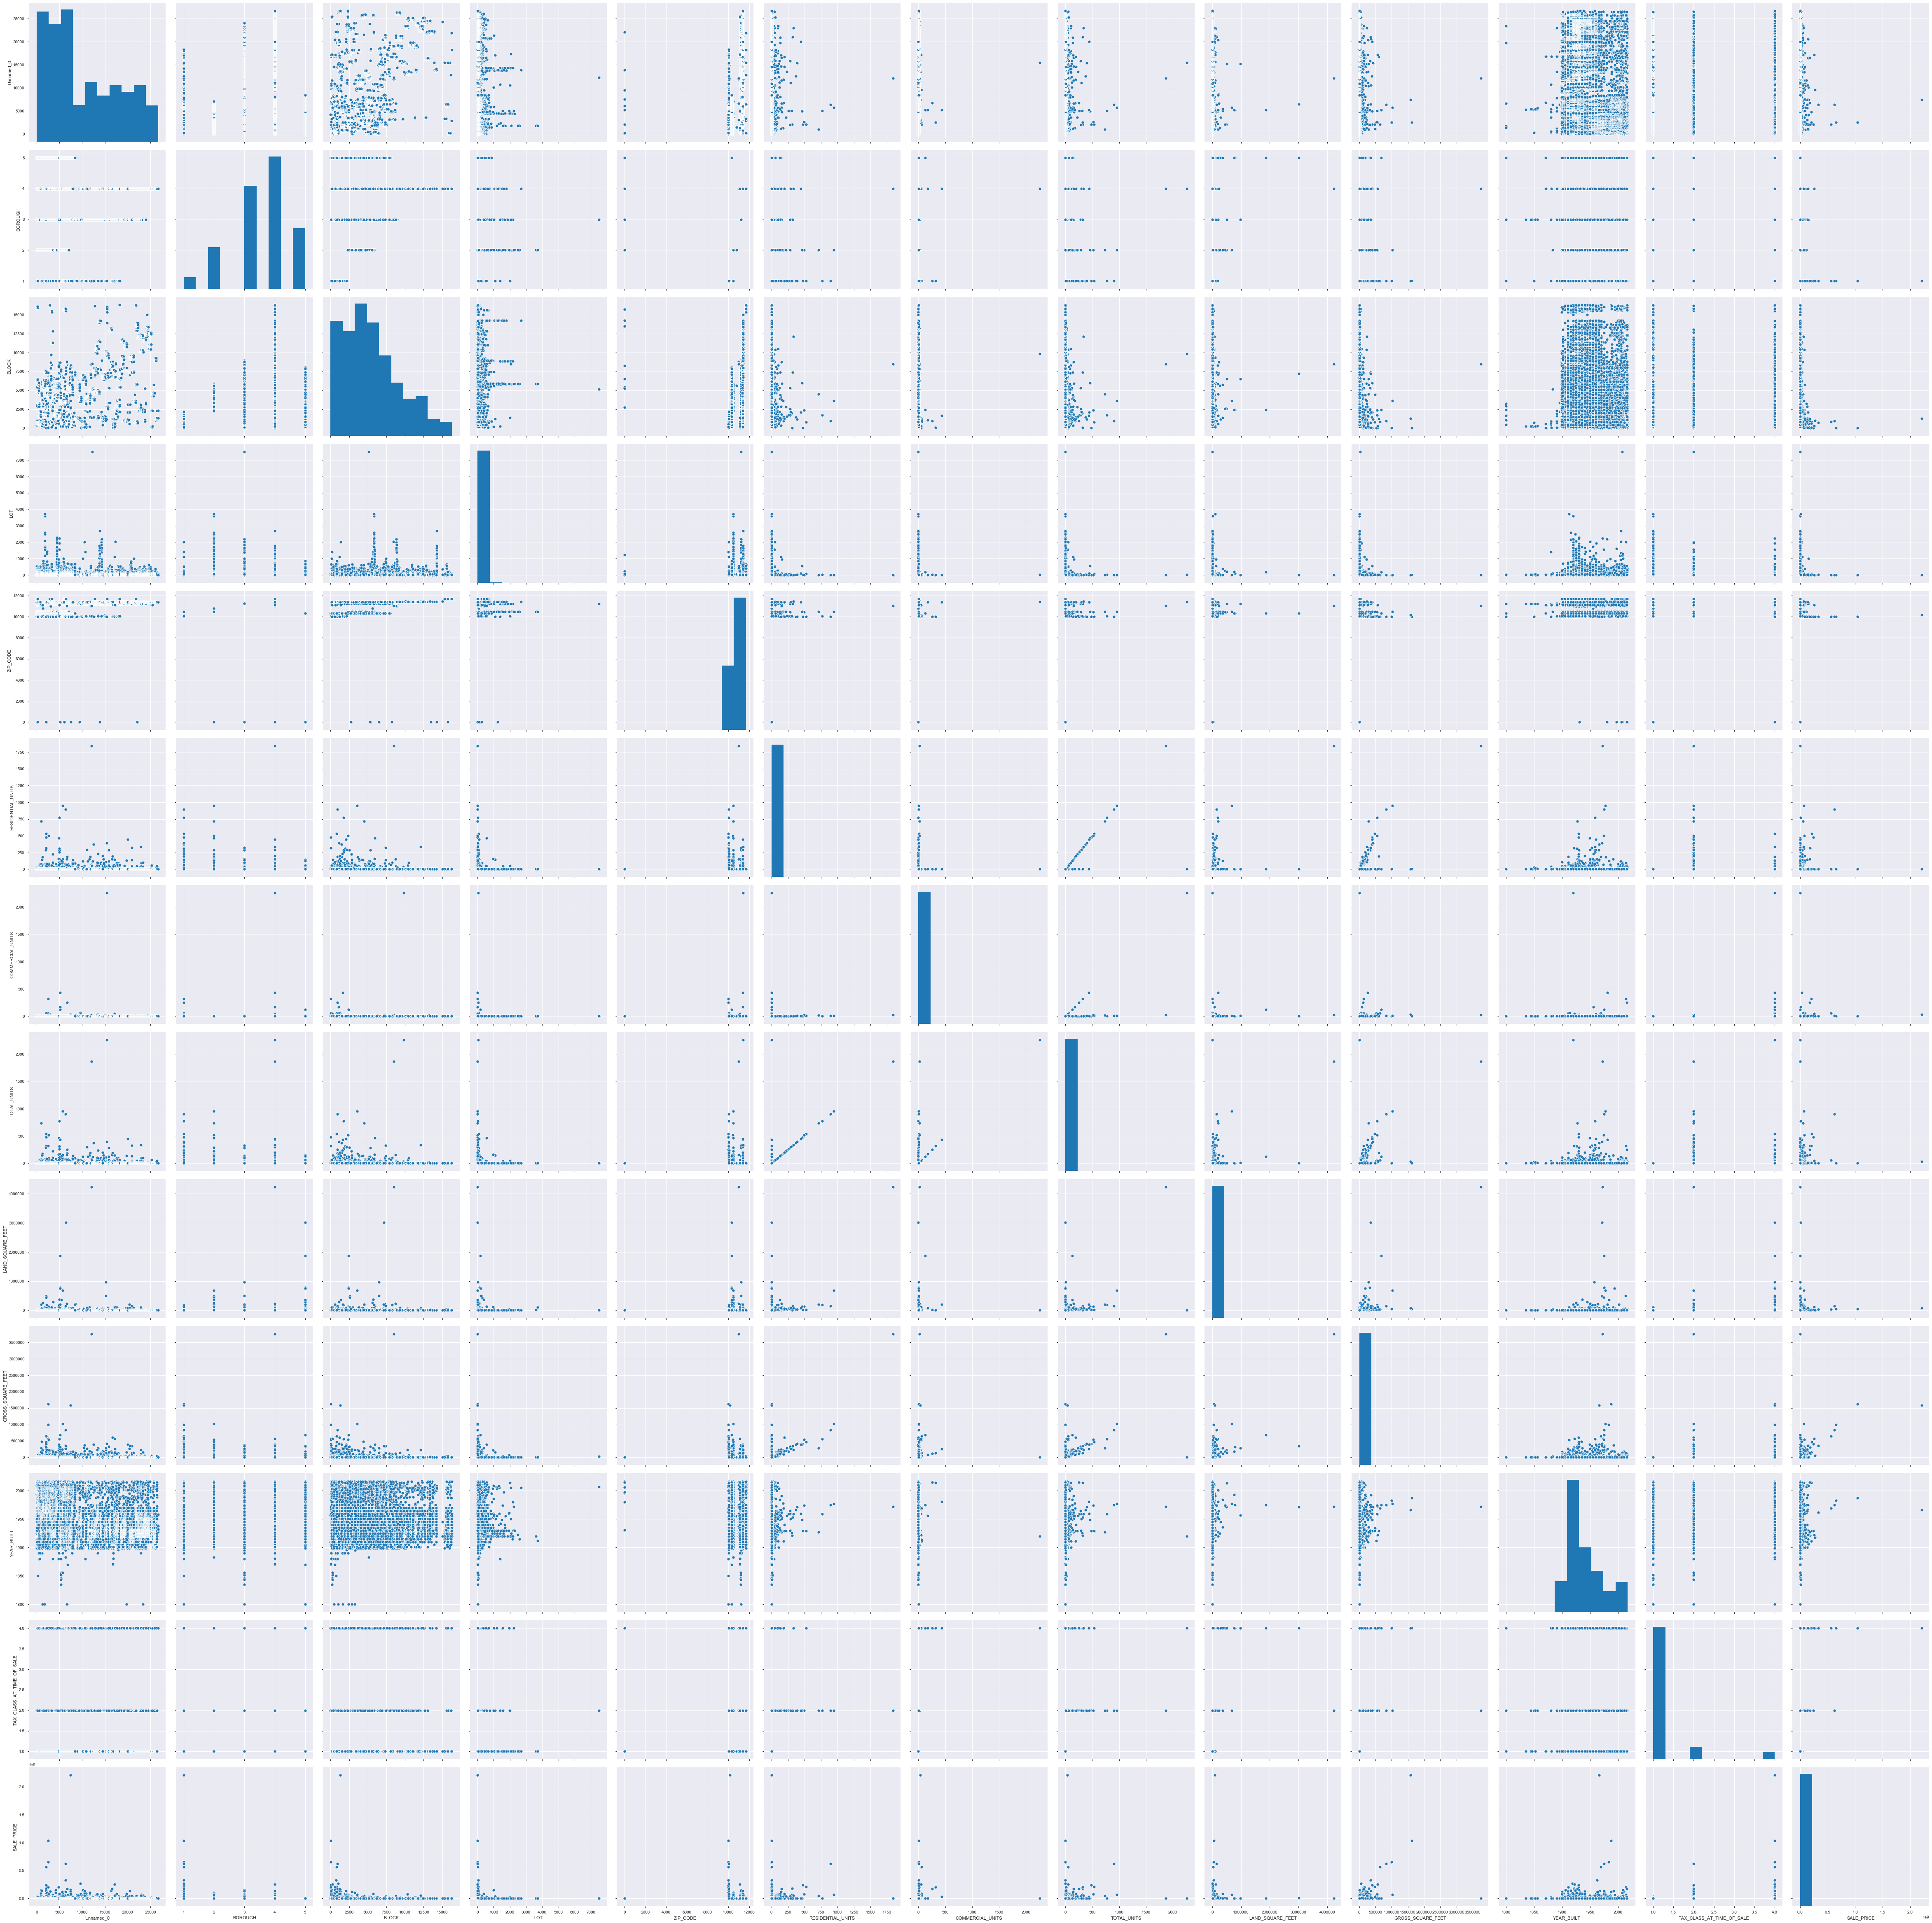

In [86]:
sns.pairplot(new_data, height=5)

In [85]:
num_data = new_data[['LAND_SQUARE_FEET','GROSS_SQUARE_FEET','YEAR_BUILT']]
cat_data = new_data[['TAX_CLASS_AT_PRESENT', 'BOROUGH', 'BUILDING_CLASS_CATEGORY']]

In [28]:
num_data.isnull().sum()

LAND_SQUARE_FEET     0
GROSS_SQUARE_FEET    0
YEAR_BUILT           0
dtype: int64

In [29]:
cat_data.isnull().sum()

TAX_CLASS_AT_PRESENT       0
BOROUGH                    0
BUILDING_CLASS_CATEGORY    0
dtype: int64

In [30]:
scale = StandardScaler()
scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled = scale.fit_transform(num_data)
scaled[:, :3]

array([[-6.89504614e-02,  5.46117740e-02, -1.33313488e+00],
       [-5.21860985e-02,  6.50036975e-02, -9.07385765e-01],
       [-4.96412734e-02,  1.03759216e-03, -1.33313488e+00],
       ...,
       [-6.85148328e-03, -9.05228863e-02, -5.14386587e-01],
       [ 5.34601746e+00,  1.74776141e+00,  1.97460821e+00],
       [ 1.71443682e-01, -6.39853190e-02,  2.13835787e+00]])

In [51]:
num_data_scaled = pd.DataFrame(scale.fit_transform(num_data), index=num_data.index, columns=num_data.columns)
num_data_scaled.head()

LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT
0         -0.068950           0.054612   -1.333135
3         -0.052186           0.065004   -0.907386
4         -0.049641           0.001038   -1.333135
6         -0.065881          -0.010382   -0.678136
9          0.005978           0.409317   -0.678136

In [33]:
cat_data = cat_data.astype({'BOROUGH': 'object'})

In [47]:
cat_data = pd.get_dummies(cat_data)
cat_data.head()

TAX_CLASS_AT_PRESENT_1  TAX_CLASS_AT_PRESENT_2  TAX_CLASS_AT_PRESENT_2A  \
0                       0                       0                        1   
3                       0                       0                        0   
4                       0                       0                        1   
6                       0                       0                        0   
9                       0                       1                        0   

   TAX_CLASS_AT_PRESENT_2B  TAX_CLASS_AT_PRESENT_2C  TAX_CLASS_AT_PRESENT_4  \
0                        0                        0                       0   
3                        1                        0                       0   
4                        0                        0                       0   
6                        1                        0                       0   
9                        0                        0                       0   

   BOROUGH_1  BOROUGH_2  BOROUGH_3  BOROUGH_4  ...  \
0          1          0          0          0  ...   
3          1          0          0          0  ...   
4          1          0          0          0  ...   
6          1          0          0          0  ...   
9          1          0          0          0  ...   

   BUILDING_CLASS_CATEGORY_31 COMMERCIAL VACANT LAND                    \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_32 HOSPITAL AND HEALTH FACILITIES            \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_33 EDUCATIONAL FACILITIES                    \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_34 THEATRES                                  \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES     \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES           \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_37 RELIGIOUS FACILITIES              

In [80]:
X = pd.concat([num_data_scaled, cat_data], axis=1)
X.head()

LAND_SQUARE_FEET  GROSS_SQUARE_FEET  YEAR_BUILT  TAX_CLASS_AT_PRESENT_1  \
0         -0.068950           0.054612   -1.333135                       0   
3         -0.052186           0.065004   -0.907386                       0   
4         -0.049641           0.001038   -1.333135                       0   
6         -0.065881          -0.010382   -0.678136                       0   
9          0.005978           0.409317   -0.678136                       0   

   TAX_CLASS_AT_PRESENT_2  TAX_CLASS_AT_PRESENT_2A  TAX_CLASS_AT_PRESENT_2B  \
0                       0                        1                        0   
3                       0                        0                        1   
4                       0                        1                        0   
6                       0                        0                        1   
9                       1                        0                        0   

   TAX_CLASS_AT_PRESENT_2C  TAX_CLASS_AT_PRESENT_4  BOROUGH_1  ...  \
0                        0                       0          1  ...   
3                        0                       0          1  ...   
4                        0                       0          1  ...   
6                        0                       0          1  ...   
9                        0                       0          1  ...   

   BUILDING_CLASS_CATEGORY_31 COMMERCIAL VACANT LAND                    \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_32 HOSPITAL AND HEALTH FACILITIES            \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_33 EDUCATIONAL FACILITIES                    \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_34 THEATRES                                  \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES     \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                                  0                     

   BUILDING_CLASS_CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES           \
0                                                  0                     
3                                                  0                     
4                                                  0                     
6                                                  0                     
9                                          

In [59]:
y = new_data.SALE_PRICE
y.head()

0     6625000.0
3     3936272.0
4     8000000.0
6     3192840.0
9    16232000.0
Name: SALE_PRICE, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
accuracy = model.score(X_test, y_test)
accuracy

0.40948916017232195

In [69]:
y_pred = model.predict(X_test)
y_pred

array([ 400568.49208046,  548701.61753483,  456855.75096347, ...,
        421722.83877451, 2077156.5529402 , 2537699.43180164])

In [72]:
mae(y_test, y_pred)

1293481.2087777236

In [76]:
mean_square = mse(y_test, y_pred)
mean_square

519028130826838.0

In [77]:
sqrt(mean_square)

22782188.89454738